In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingSwitzerland.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,5195,2015-11-17,Switzerland,46.200527,6.137218,2.0,1.0,1.0,1.0,70.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11
1,5196,2016-01-05,Switzerland,46.209153,6.137909,3.0,1.0,0.0,3.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,5197,2015-07-07,Switzerland,46.205714,6.163190,2.0,1.0,1.0,1.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7
3,5198,2016-03-18,Switzerland,46.285372,6.164868,2.0,1.0,1.0,1.0,80.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
4,5201,2012-12-22,Switzerland,46.190586,6.201765,2.0,1.0,0.0,1.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,477181,2016-01-28,Switzerland,46.286577,6.163685,2.0,1.0,1.0,2.0,85.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
1733,477183,2012-05-10,Switzerland,46.190201,6.200421,4.0,1.5,2.0,2.0,118.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5
1734,477184,2015-02-27,Switzerland,46.193129,6.195190,2.0,1.0,1.0,1.0,65.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,2
1735,477186,2013-10-07,Switzerland,46.234977,6.083853,1.0,1.5,1.0,1.0,45.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,10


<AxesSubplot:ylabel='Frequency'>

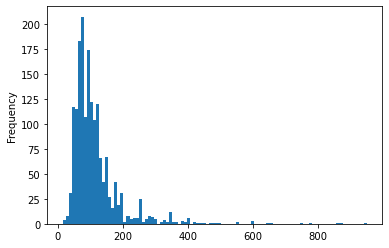

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,5195,2015-11-17,Switzerland,46.200527,6.137218,2.0,1.0,1.0,1.0,70.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,11,group_2
1,5196,2016-01-05,Switzerland,46.209153,6.137909,3.0,1.0,0.0,3.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,group_3
2,5197,2015-07-07,Switzerland,46.205714,6.163190,2.0,1.0,1.0,1.0,135.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7,group_3
3,5198,2016-03-18,Switzerland,46.285372,6.164868,2.0,1.0,1.0,1.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3,group_2
4,5201,2012-12-22,Switzerland,46.190586,6.201765,2.0,1.0,0.0,1.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,12,group_2


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_2    0.503960
group_3    0.245500
group_1    0.087833
group_4    0.084953
group_5    0.077754
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_2    0.505747
group_3    0.244253
group_1    0.086207
group_4    0.086207
group_5    0.077586
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
1595,441173,2015-11-28,Switzerland,46.210481,6.147236,6.0,1.0,2.0,2.0,199.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,11
893,294569,2015-04-11,Switzerland,46.186871,6.143865,2.0,1.0,1.0,1.0,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,4
1134,340894,2015-06-14,Switzerland,46.210649,6.145090,2.0,0.5,1.0,1.0,79.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,6
1446,409380,2012-12-24,Switzerland,46.204897,6.140893,2.0,1.0,0.0,1.0,89.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,12
856,232184,2015-04-10,Switzerland,46.202955,6.156142,2.0,0.5,1.0,1.0,120.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,4


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
970,46.202675,6.159388,2.0,1.0,0.0,1.0,130.0,1.0,0.0,1.0,1125.0,4.0,1.0,0.0,0.0,6,6
82,46.235072,6.123452,2.0,2.0,1.0,1.0,70.0,1.0,10.0,3.0,700.0,19.0,0.0,1.0,0.0,2,5
521,46.222896,6.132045,2.0,1.0,1.0,1.0,90.0,1.0,0.0,2.0,1125.0,7.0,0.0,1.0,0.0,2,8
321,46.206325,6.162886,2.0,1.0,1.0,1.0,99.0,1.0,0.0,10.0,1125.0,1.0,1.0,0.0,0.0,0,7
735,46.202603,6.139123,2.0,1.0,1.0,1.0,55.0,1.0,0.0,1.0,1125.0,1.0,0.0,1.0,0.0,2,1


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
1595,199.0
893,60.0
1134,79.0
1446,89.0
856,120.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1595,46.210481,6.147236,6.0,1.0,2.0,2.0,1.0,5.0,1.0,1125.0,30.0,1.0,0.0,0.0,5,11
893,46.186871,6.143865,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,1.0,0.0,1.0,0.0,5,4
1134,46.210649,6.145090,2.0,0.5,1.0,1.0,1.0,0.0,1.0,1125.0,2.0,0.0,1.0,0.0,6,6
1446,46.204897,6.140893,2.0,1.0,0.0,1.0,1.0,14.0,2.0,15.0,22.0,1.0,0.0,0.0,0,12
856,46.202955,6.156142,2.0,0.5,1.0,1.0,1.0,25.0,1.0,7.0,1.0,0.0,1.0,0.0,4,4


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
970,130.0
82,70.0
521,90.0
321,99.0
735,55.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
970,46.202675,6.159388,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1125.0,4.0,1.0,0.0,0.0,6,6
82,46.235072,6.123452,2.0,2.0,1.0,1.0,1.0,10.0,3.0,700.0,19.0,0.0,1.0,0.0,2,5
521,46.222896,6.132045,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1125.0,7.0,0.0,1.0,0.0,2,8
321,46.206325,6.162886,2.0,1.0,1.0,1.0,1.0,0.0,10.0,1125.0,1.0,1.0,0.0,0.0,0,7
735,46.202603,6.139123,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,1.0,0.0,1.0,0.0,2,1


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_1476/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

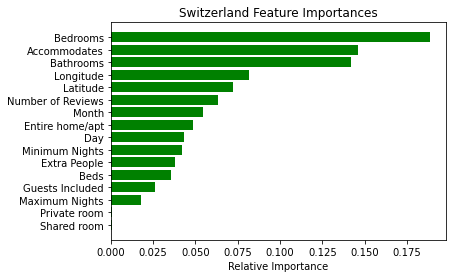

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Switzerland Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

585.7191034557236 24.201634313734342 13.107940964722822


In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)